# Plan Overview:
# 1. Data Preprocessing
# 2. Splitting Data for Training and Testing
# 3. Model Selection and Training
# 4. Model Evaluation
# 5. Model Improvement (if necessary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   MonthlySpend          1000 non-null   float64
 3   Tenure                1000 non-null   int64  
 4   CustomerSupportCalls  1000 non-null   int64  
 5   HasInternetService    1000 non-null   int64  
 6   Churn                 1000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 54.8 KB
None
        CustomerID          Age  MonthlySpend       Tenure  \
count  1000.000000  1000.000000   1000.000000  1000.000000   
mean    500.500000    40.986000    277.496480    59.096000   
std     288.819436    13.497852    127.724385    35.118772   
min       1.000000    18.000000     52.080000     1.000000   
25%     250.750000    29.000000    165.857500    28.000000   
50%     

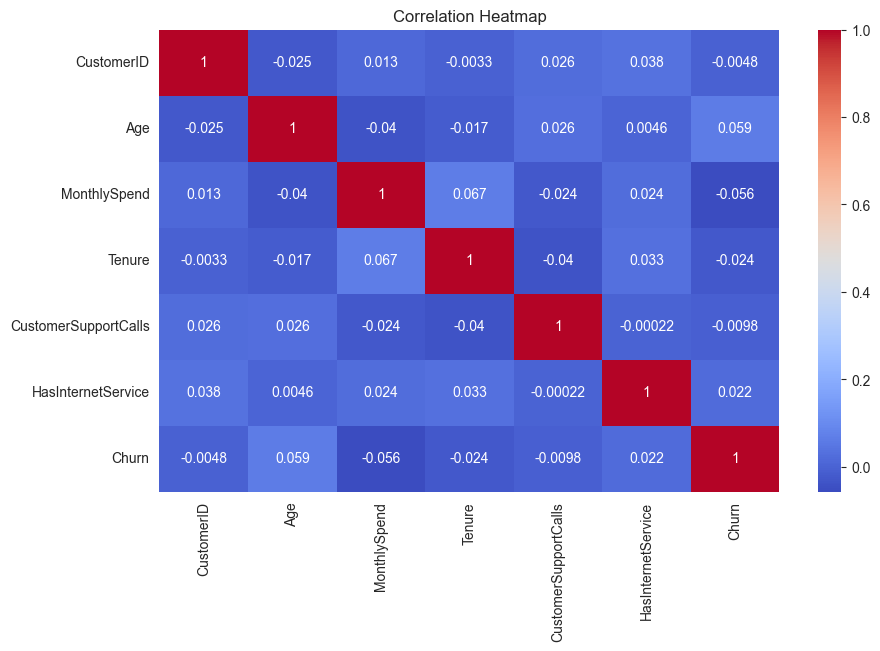

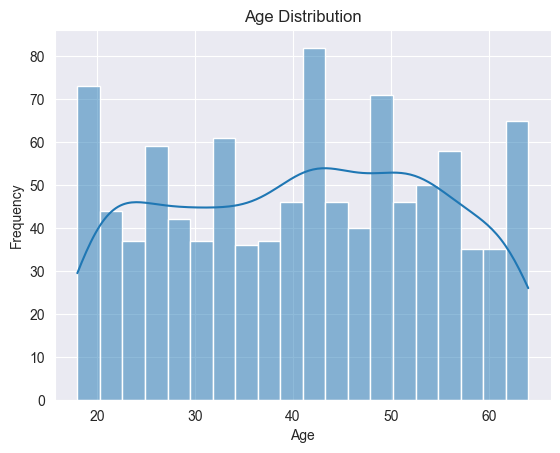

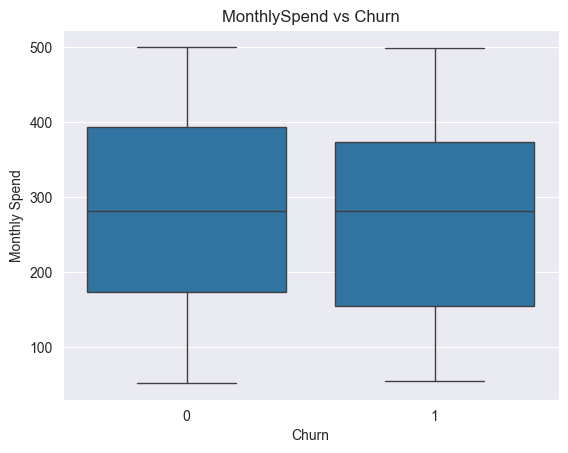

Best Parameters: {'logreg__C': 0.1, 'logreg__solver': 'lbfgs'}
Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.54      0.47      0.50       152
           1       0.52      0.59      0.56       148

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300

Random Forest Accuracy:  0.53
              precision    recall  f1-score   support

           0       0.54      0.51      0.52       152
           1       0.52      0.55      0.54       148

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# For consistent results
np.random.seed(42)

# Load dataset (assume it's in CSV format)
df = pd.read_csv("data/cleaned_customer_data.csv")

# Review the dataset structure
print(df.info())
print(df.describe())

# Save the cleaned dataset to a CSV file
df.to_csv('data/cleaned_data.csv', index=False)

# Correlation heatmap for feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('data/correlation_heatmap.png')
plt.show()

# Plotting Age distribution
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('data/age_distribution.png')
plt.show()

# Relationship between MonthlySpend and Churn
sns.boxplot(x='Churn', y='MonthlySpend', data=df)
plt.title('MonthlySpend vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Spend')
plt.savefig('data/monthly_spend_vs_churn.png')
plt.show()

# Define the target variable and features
X = df.drop(columns=['Churn'])  # Assuming 'Churn' is the target column
y = df['Churn']

# Split data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a pipeline for scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'logreg__C': [0.1, 1, 10],
    'logreg__solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predicting on test data
y_pred = best_model.predict(X_test)

# Model Evaluation
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Model Predictions for Random Forest
y_rf_pred = rf_model.predict(X_test)

# Random Forest Evaluation
print("Random Forest Accuracy: ", accuracy_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))